# Lifei Wang 
## 8855277
## CSCN8000-Lab2

**Part A:**

Use the **Lab2 dataset** provided. 

Load the dataset and split it into test and train. 

After that, train the model using Gaussian and Multinominal classifiers and post which model performs better. 

Use the trained model to perform some predictions on test data.

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline
import string

In [16]:
# load dataset
data = pd.read_csv('../../practical_labs/Lab2_dataset.csv')
data.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [19]:
# Split the dataset into features (text) and labels
X = data['text']
y = data['label_num']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Gaussian Naive Bayes classifier
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train_vec.toarray(), y_train)

# Train Multinomial Naive Bayes classifier
multinomial_clf = MultinomialNB()
multinomial_clf.fit(X_train_vec, y_train)

MultinomialNB()

In [20]:
# Evaluate model performance
gaussian_accuracy = gaussian_clf.score(X_test_vec.toarray(), y_test)
multinomial_accuracy = multinomial_clf.score(X_test_vec, y_test)

print('Gaussian Classifier Accuracy:', gaussian_accuracy)
print('Multinomial Classifier Accuracy:', multinomial_accuracy)

# Perform predictions given test samples
test_samples = [
    "keno has become a favorite to gambiers who want the excitement of a lottery draw without having to wait for a weekiy offering combining sophisticated hardware , software and cutting edge encryption",
    "nformation provided within this report pertaining to investing , stocks , securities must be understood as information provided",
    "toni graham - accounting , risk and confirmation / settlements positions ( or openings requiring a similar skill set of this candidate pool"
]

# Vectorize test samples
test_samples_vec = vectorizer.transform(test_samples)

# Predict using two classifiers
gaussian_predictions = gaussian_clf.predict(test_samples_vec.toarray())

multinomial_predictions = multinomial_clf.predict(test_samples_vec)

# print predicted results of both models
print('Gaussian Classifier Predictions:', gaussian_predictions)
print('Multinomial Classifier Predictions:', multinomial_predictions)

Gaussian Classifier Accuracy: 0.9545893719806763
Multinomial Classifier Accuracy: 0.9719806763285024
Gaussian Classifier Predictions: [1 0 0]
Multinomial Classifier Predictions: [1 1 0]


Multinomial classifier has a higher accuracy therefore performs better than Gaussian classifier.

It is because the dataset is text and multinomial classifier is better for classification of data with count and frequencies

Whereas Gaussian classifier is better for continuous and numerical data classification

**Part B:**

Use this **air bnb new york city dataset** and remove outliers based on price per night for a given apartment/home. 

You can demonstrate why using other techniques like mean/median/ percentile works. 

The task is to come up with a clean dataset that does not have outliers showcasing all the possibilities.

In [21]:
airbnb = pd.read_csv('../../practical_labs/AB_NYC_2019.csv')
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


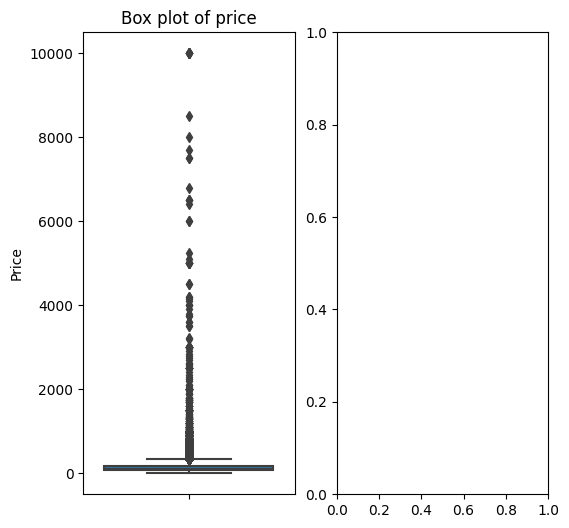

Number of Rows before removing outliers:: 48895


In [26]:
# box plot to detect outliers
fig, axis = plt.subplots(1, 2, figsize=(6,6))

# box plot of price
sns.boxplot(data=airbnb, y='price', ax = axis[0])
axis[0].set_ylabel('Price')
axis[0].set_title('Box plot of price')

plt.show()
print('Number of Rows before removing outliers::', len(airbnb))

There are some extreme values, we can replace these outliers with 95 percentile

In [27]:
# calculate mean, median and 95 percentile of price
mean = airbnb['price'].mean()
median = airbnb['price'].median()
percentile_95 = airbnb['price'].quantile(0.95)

print('Mean price:', mean)
print('Median Price:', median)
print('95th Percentile:', percentile_95)

# Remove outliers based on the 95th percentile
clean_data = airbnb[airbnb['price'] <= percentile_95]

Mean price: 152.7206871868289
Median Price: 106.0
95th Percentile: 355.0


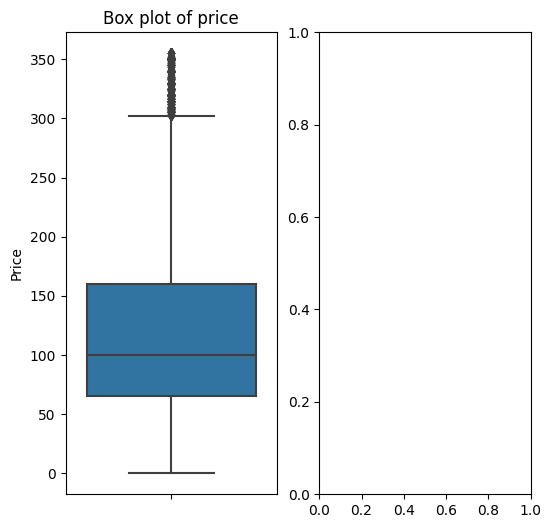

Number of Rows after removing outliers: 46454


In [25]:
# box plot after removing outliers
fig, axis = plt.subplots(1, 2, figsize=(6,6))

sns.boxplot(data=clean_data, y='price', ax = axis[0])
axis[0].set_ylabel('Price')
axis[0].set_title('Box plot of price')

plt.show()

print('Number of Rows after removing outliers:', len(clean_data))